# Decision Tree Classification

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time # for time measurement
from sklearn.tree import DecisionTreeClassifier # for decision tree model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score # for model evaluation
from sklearn.tree import plot_tree # for decision tree visualization

# 1. Data Source and Contents

In [2]:
# read the dataset
url = 'https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true'
df = pd.read_csv(url)

In [3]:
# to show the first 5 rows of the dataset
df.head()

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0

In [4]:
# to show no. of rows and columns
df.shape

(48842, 11)

### Q.1 Why does it makes sense to discretize columns for this problem?
Discretizing columns for this problem makes sense because it simplifies the prediction task by reducing the complexity of the data. In the context of a decision tree classifier, discretizing continuous variables allows the algorithm to partition the feature space into distinct categories or ranges, which makes it easier for the tree to split the data based on these categories. This can lead to more interpretable and meaningful splits, as decision trees work by finding the best feature and threshold to split the data at each node.

### Q.2 What might be the issues (if any) if we DID NOT discretize the columns.
Discretization simplifies decision-making by converting continuous variables into discrete categories, reducing model complexity and aiding decision trees in finding optimal splits. Discretization also helps in handling outliers and noise in the data, as extreme values are often placed into the same category as values that are closer to them, thereby reducing their impact on the model. Since it also helps in reducing the noise in the data, it can prevent the issue of overfitting. Additionally, discretizing columns enhances interpretability, making it easier to understand and interpret the model, which is crucial in domains like demographic-based decision-making. Despite the inevitable loss of information, the benefits of simplification and performance improvement, especially in decision tree classifiers, justify this trade-off.

# 2. Data Quality Analysis (DQA)

In [5]:
# to show the non-non null count and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [6]:
# look at unique records for each column
for col in df.columns:
    print(col, df[col].unique())

hours_per_week_bin ['b. 31-40' 'a. 0-30' 'd. 41-50 & 61-70' 'c. 71-100' 'e. 51-60']
occupation_bin ['b. Mid - Low' 'e. High' 'a. Low' 'c. Mid - Mid' 'd. Mid - High']
msr_bin ['b. Mid' 'c. High' 'a. Low']
capital_gl_bin ['c. > 0' 'a. = 0' 'b. < 0']
race_sex_bin ['c. High' 'b. Mid' 'a. Low']
education_num_bin ['c. 13' 'b. 9-12' 'a. 0-8' 'd. 14' 'e. 15+']
education_bin ['c. Bachelors' 'b. Mid' 'a. Low' 'd. Masters' 'e. High']
workclass_bin ['b. income' 'a. no income']
age_bin ['d. 36-40 & 56-60' 'e. 40-55' 'b. 26-30 & 71-100' 'c. 31-35 & 61-70'
 'a. 0-25']
flag ['train' 'test']
y [0 1]


In [7]:
# counting the frequency of each bin within each column separately
for col in df.columns:
    print(df[col].value_counts())

hours_per_week_bin
b. 31-40            26639
d. 41-50 & 61-70     9819
a. 0-30              7851
e. 51-60             3759
c. 71-100             774
Name: count, dtype: int64
occupation_bin
c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: count, dtype: int64
msr_bin
c. High    22047
b. Mid     15868
a. Low     10927
Name: count, dtype: int64
capital_gl_bin
a. = 0    42525
c. > 0     4035
b. < 0     2282
Name: count, dtype: int64
race_sex_bin
c. High    29737
b. Mid     16457
a. Low      2648
Name: count, dtype: int64
education_num_bin
b. 9-12    30324
c. 13       8025
a. 0-8      6408
d. 14       2657
e. 15+      1428
Name: count, dtype: int64
education_bin
b. Mid          30324
c. Bachelors     8025
a. Low           6408
d. Masters       2657
e. High          1428
Name: count, dtype: int64
workclass_bin
b. income       46012
a. no income     2830
Name: count, dtype: int64
age_bin
e. 40-55             13963
a. 0-25

In [8]:
# THE DATA QUALITY REPORT
# Combine the missing values count, data types, and unique values into one DataFrame
data_quality_report_concise = pd.DataFrame({
    'Data Type': df.dtypes, # data types of each column
    'Missing Values': df.isnull().sum(),  # missing values count
    'Unique Values': df.nunique() # unique values count
}).join(df.describe(include='all').transpose()) # include the summary statistics

# Display the Data Quality Report
print("Data Quality Report:")
print(data_quality_report_concise)

Data Quality Report:
                   Data Type  Missing Values  Unique Values    count unique  \
hours_per_week_bin    object               0              5    48842      5   
occupation_bin        object               0              5    48842      5   
msr_bin               object               0              3    48842      3   
capital_gl_bin        object               0              3    48842      3   
race_sex_bin          object               0              3    48842      3   
education_num_bin     object               0              5    48842      5   
education_bin         object               0              5    48842      5   
workclass_bin         object               0              2    48842      2   
age_bin               object               0              5    48842      5   
flag                  object               0              2    48842      2   
y                      int64               0              2  48842.0    NaN   

                             t

Text(0.5, 1.0, 'Bar chart of the target variable (y)')

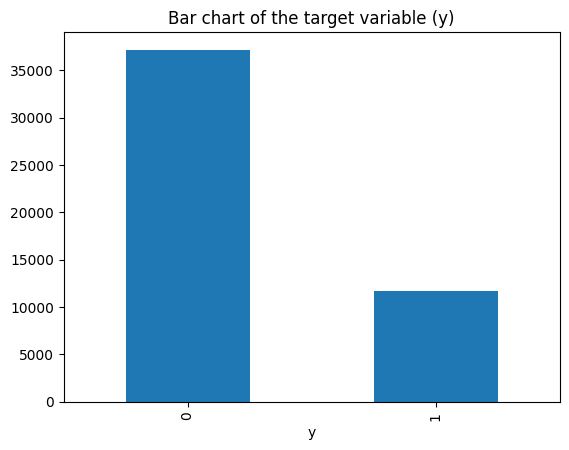

In [9]:
# to make a bar chart of the target variable (y)
df['y'].value_counts().plot(kind='bar')
plt.title('Bar chart of the target variable (y)')

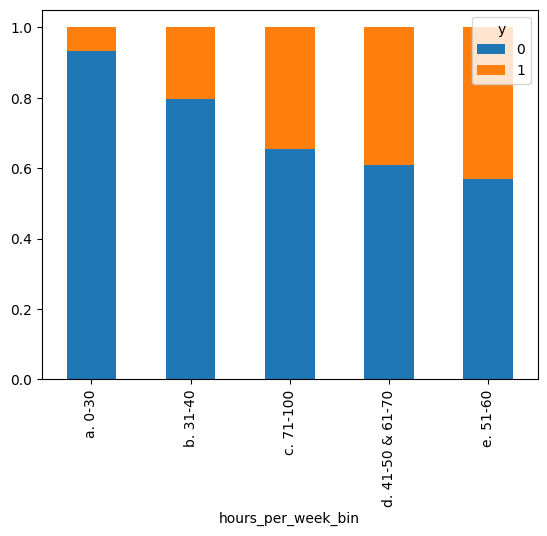

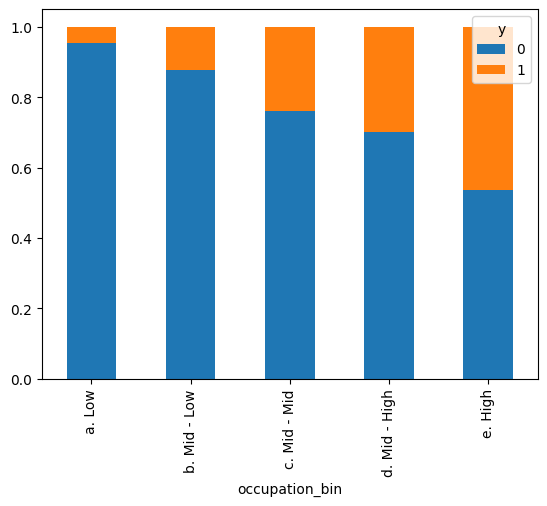

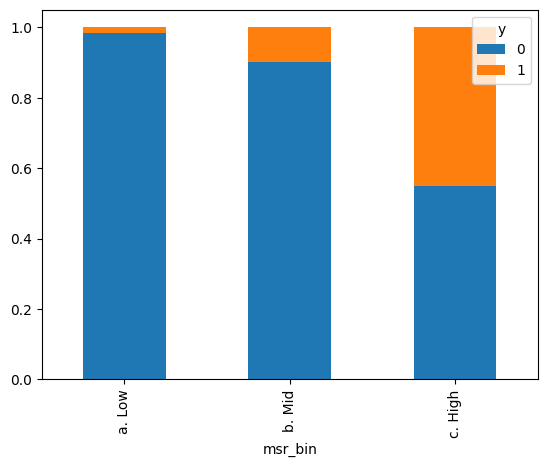

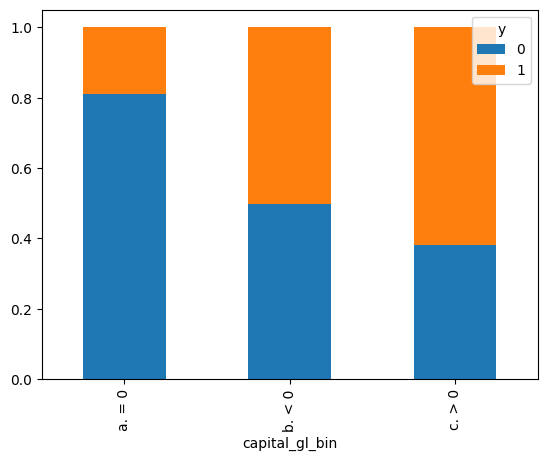

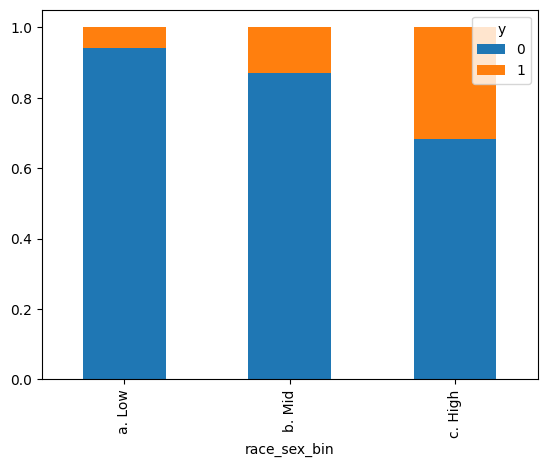

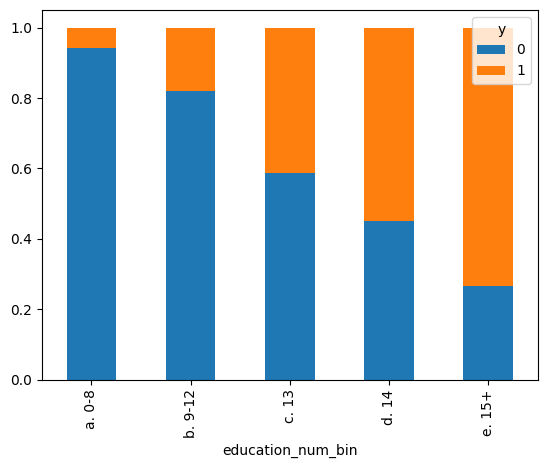

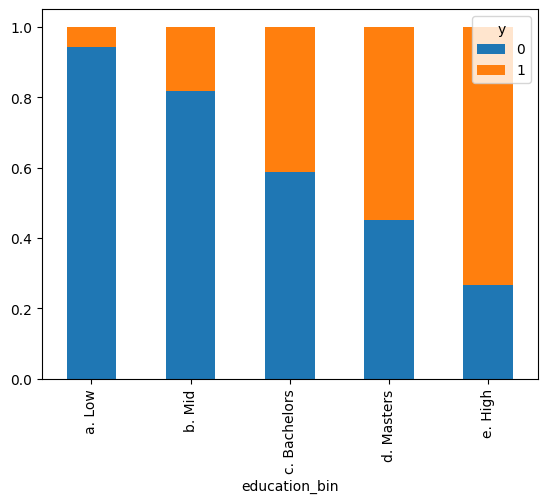

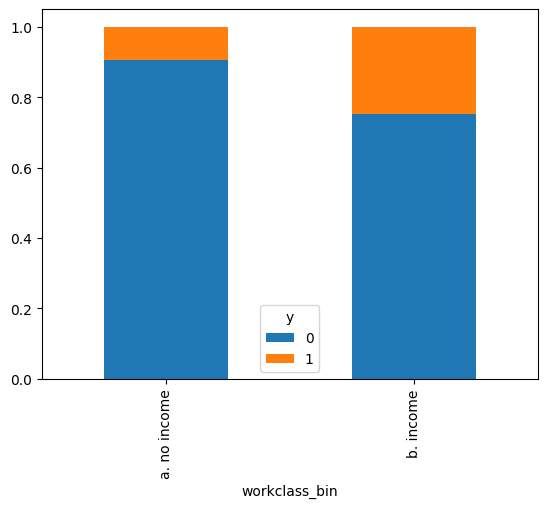

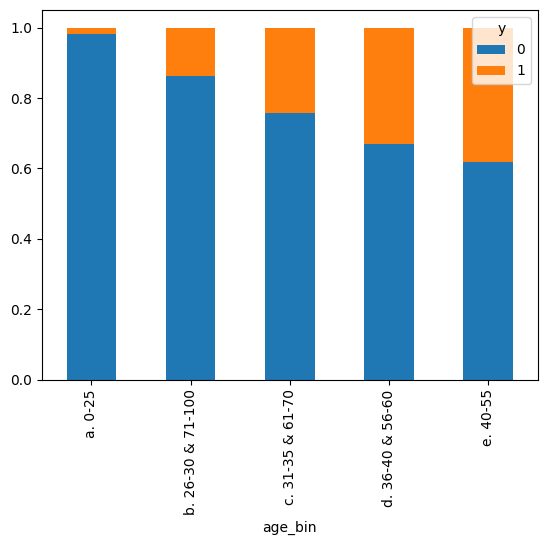

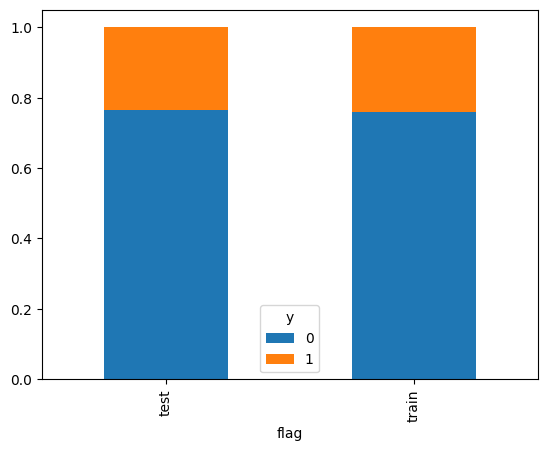

In [10]:
# the proportion of each category within each feature relative to the target variable's classes
# to make a stacked bar chart for each categorical variable based on the target variable
for col in df.select_dtypes(include=['object']).columns:
    pd.crosstab(df[col], df['y'], normalize='index').plot(kind='bar', stacked=True)
    plt.show()

## 3. Build Decision Tree Classifier Models

In [11]:
# Splitting the dataset into features (X) and target variable (y)
X = df.drop(['y', 'flag'], axis=1)  # Drop 'flag' as well since it's not a feature for modeling
y = df['y']

# Splitting the dataset into training and testing sets based on the 'flag' column
X_train, X_test = X[df['flag'] == 'train'], X[df['flag'] == 'test']
y_train, y_test = y[df['flag'] == 'train'], y[df['flag'] == 'test']

# Encoding categorical features with pd.get_dummies
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Now, X_train_encoded and X_test_encoded are ready for model training and evaluation

In [12]:
# With no hyperparameter tuning – using the default parameters: max_depth=None, max_features=None, min_samples_leaf=1

# Instantiate the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=101)

# Train the classifier on the encoded training data
dt_classifier.fit(X_train_encoded, y_train)

# Predict the target variable for the testing set
y_pred = dt_classifier.predict(X_test_encoded)

# 4. Evaluate Decision Tree Performance

In [13]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}\n")

# Detailed classification report
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Confusion Matrix: 
[[11488   947]
 [ 1716  2130]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.69      0.55      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281

Accuracy: 0.8364351084085744
Precision: 0.8280367702883276
Recall: 0.8364351084085744
F1 Score: 0.829803726244958


# 5. Tune Decision Tree Performance

### Q.3 Decision Tree Hyper-parameter variation vs. performance
When examining decision tree hyper-parameter variation versus performance, we systematically adjust parameters like tree depth, minimum sample splits, and leaf size to explore their impact on metrics like accuracy and overfitting. Through this process, we identify the optimal parameter configuration that balances model complexity and generalization ability for the given dataset and problem domain.

In [14]:
# Initialize lists to store hyperparameters
split_criteria = ['entropy', 'gini']
min_samples_leaf = [5, 10, 15, 20, 25, 30, 35, 40]
max_features = ["sqrt", None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] # "sqrt" was used because "auto" is deprecated
max_depths = [2, 4, 6, 8, 10, 12, 14, 16]

# Initialize a dictionary to store the best hyperparameters
best_params = {
    'criterion': None,
    'min_samples_leaf': None,
    'max_features': None,
    'max_depth': None
}

# Initialize lists to store the results for each run
results_list_run1 = []
results_list_run2 = []
results_list_run3 = []
results_list_run4 = []

# Start timing the tuning process
start_time = time.time()

#----------------------------------------------

# RUN 1: Varying 'criterion'
for criterion in split_criteria: # entropy and gini
    dtree = DecisionTreeClassifier(criterion=criterion, random_state=101) # instantiate the model
    dtree.fit(X_train_encoded, y_train) # fit the model
    y_pred = dtree.predict(X_test_encoded) # predict the target variable
    
    # Calculate the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Append the results to the list as a dictionary
    results_list_run1.append({
        'Split Criterion': criterion,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list_run1)

# Display the results DataFrame
print(f"Run 1 Split-Criterion Results:\n{results_df}\n")

# Determine the best split criteria based on accuracy
best_params['criterion'] = results_df['Split Criterion'][results_df['Accuracy'].idxmax()]
print(f"The best split criterion is: {best_params['criterion']}\n")

#----------------------------------------------

# RUN 2: Varying 'min_samples_leaf' using the best 'criterion' from Run 1
for min_samples in min_samples_leaf:
    dtree = DecisionTreeClassifier(criterion=best_params['criterion'], min_samples_leaf=min_samples, random_state=101)
    dtree.fit(X_train_encoded, y_train)
    y_pred = dtree.predict(X_test_encoded)
    
    # Calculate the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Append the results to the list as a dictionary for Run 2
    results_list_run2.append({
        'Min Samples Leaf': min_samples,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert the list of dictionaries to a DataFrame for Run 2
results_df_run2 = pd.DataFrame(results_list_run2)

# Display the results DataFrame for Run 2
print(f"Run 2 Min-Samples-Leaf Results:\n{results_df_run2}\n")

# Determine the best min_samples_leaf based on accuracy
best_params['min_samples_leaf'] = results_df_run2['Min Samples Leaf'][results_df_run2['Accuracy'].idxmax()]
print(f"The best min_samples_leaf is: {best_params['min_samples_leaf']}\n")

#----------------------------------------------

# RUN 3: Varying 'max_features'
for max_feature in max_features:
    dtree = DecisionTreeClassifier(criterion=best_params['criterion'], min_samples_leaf=best_params['min_samples_leaf'],
                                   max_features=max_feature, random_state=101)
    dtree.fit(X_train_encoded, y_train)
    y_pred = dtree.predict(X_test_encoded)
    
    # Calculate the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Append the results to the list as a dictionary for Run 3
    results_list_run3.append({
        'Max Features': max_feature,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert the list of dictionaries to a DataFrame for Run 3
results_df_run3 = pd.DataFrame(results_list_run3)

# Display the results DataFrame for Run 3
print(f"Run 3 Max-Features Results:\n{results_df_run3}\n")

# Find the best 'max_features' from Run 3 based on accuracy
best_params['max_features'] = results_df_run3['Max Features'][results_df_run3['Accuracy'].idxmax()]
print(f"The best max_features is: {best_params['max_features']}\n")

#----------------------------------------------

# RUN 4: Varying 'max_depth'
for depth in max_depths:
    dtree = DecisionTreeClassifier(criterion=best_params['criterion'], min_samples_leaf=best_params['min_samples_leaf'],
                                   max_features=best_params['max_features'], max_depth=depth, random_state=101)
    dtree.fit(X_train_encoded, y_train)
    y_pred = dtree.predict(X_test_encoded)
    
    # Calculate the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Append the results to the list as a dictionary for Run 4
    results_list_run4.append({
        'Max Depth': depth,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert the list of dictionaries to a DataFrame for Run 4
results_df_run4 = pd.DataFrame(results_list_run4)

# Display the results DataFrame for Run 4
print(f"Run 4 Max-Depth Results:\n{results_df_run4}\n")

# Find the best 'max_depth' from Run 4 based on accuracy
best_params['max_depth'] = results_df_run4['Max Depth'][results_df_run4['Accuracy'].idxmax()]
print(f"The best max_depth is: {best_params['max_depth']}\n")


# End timing the tuning process
end_tuning_time = time.time()

# Calculate total tuning time
total_tuning_time = end_tuning_time - start_time
print(f"Total tuning time: {total_tuning_time:.2f} seconds")

Run 1 Split-Criterion Results:
  Split Criterion  Accuracy  Precision    Recall  F1 Score
0         entropy  0.835575   0.688366  0.555382  0.614765
1            gini  0.836435   0.692233  0.553822  0.615340

The best split criterion is: gini

Run 2 Min-Samples-Leaf Results:
   Min Samples Leaf  Accuracy  Precision    Recall  F1 Score
0                 5  0.838831   0.699282  0.557462  0.620370
1                10  0.839998   0.701789  0.561102  0.623609
2                15  0.841963   0.709582  0.560322  0.626180
3                20  0.844051   0.714755  0.565523  0.631441
4                25  0.843314   0.711532  0.566303  0.630665
5                30  0.842332   0.712670  0.557202  0.625420
6                35  0.843069   0.714096  0.559802  0.627605
7                40  0.842454   0.713287  0.556942  0.625493

The best min_samples_leaf is: 20

Run 3 Max-Features Results:
  Max Features  Accuracy  Precision    Recall  F1 Score
0         sqrt  0.832197   0.685296  0.535621  0.601284


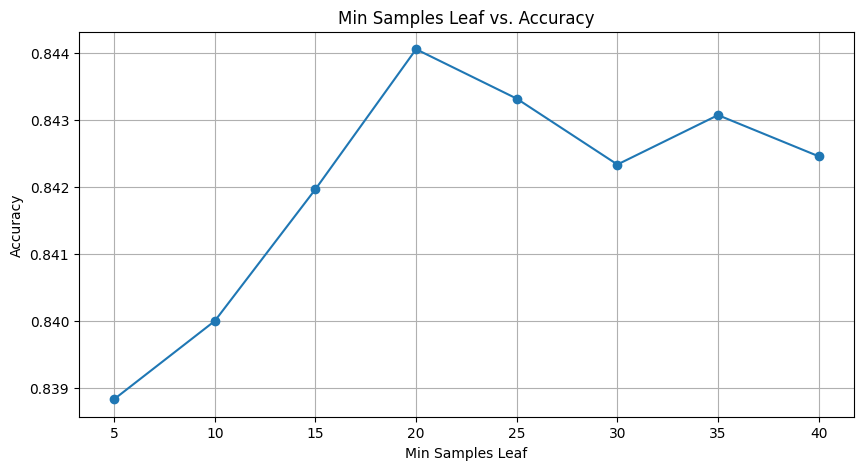

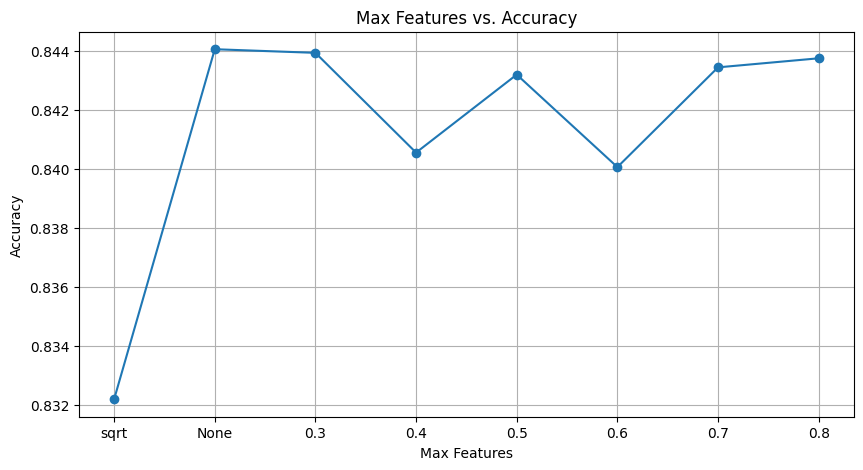

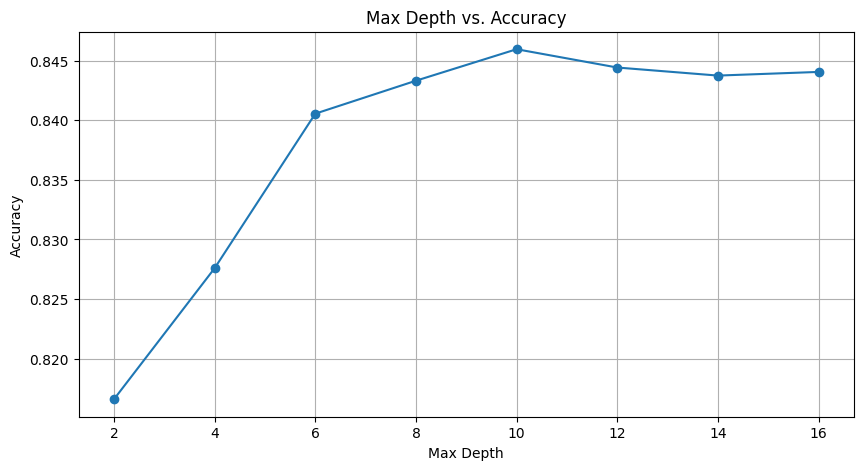

In [15]:
# Plot for 'min_samples_leaf' vs. accuracy
min_samples_leaf_values = [result['Min Samples Leaf'] for result in results_list_run2]
min_samples_leaf_accuracies = [result['Accuracy'] for result in results_list_run2]
plt.figure(figsize=(10, 5))
plt.plot(min_samples_leaf_values, min_samples_leaf_accuracies, marker='o')
plt.title('Min Samples Leaf vs. Accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot for 'max_features' vs. accuracy
# Since max_features includes None, convert it to string
max_features_values = [str(result['Max Features']) if result['Max Features'] is not None else 'None' for result in results_list_run3]
max_features_accuracies = [result['Accuracy'] for result in results_list_run3]
plt.figure(figsize=(10, 5))
plt.plot(max_features_values, max_features_accuracies, marker='o')
plt.title('Max Features vs. Accuracy')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot for 'max_depth' vs. accuracy
max_depth_values = [result['Max Depth'] for result in results_list_run4]
max_depth_accuracies = [result['Accuracy'] for result in results_list_run4]
plt.figure(figsize=(10, 5))
plt.plot(max_depth_values, max_depth_accuracies, marker='o')
plt.title('Max Depth vs. Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


##### The Best Hyperparameters:
• Split Criteria – ‘Gini Impurity’ <br>
• Minimum Sample Leaf – 20 <br>
• Maximum Features – None <br>
• Maximum Depth – 10

In [16]:
# THE BEST MODEL
# Start timing the model training and prediction with the best parameters
start_best_model_time = time.time()

# Train the best model
best_model = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    random_state=101
)
best_model.fit(X_train_encoded, y_train)

# Make predictions
y_pred_best = best_model.predict(X_test_encoded)

# Calculate accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)

# Stop timing the model training and prediction
end_best_model_time = time.time()

# Calculate and print the time taken to run the best model
time_taken_best_model = end_best_model_time - start_best_model_time
print(f"Time taken for the best model to train and predict: {time_taken_best_model:.4f} seconds")
print(f"Accuracy of the best model: {accuracy_best:.4f}")

# Classification report for the best model
report = classification_report(y_test, y_pred_best)
print("\nClassification Report for the Best Model:\n", report)

Time taken for the best model to train and predict: 0.0717 seconds
Accuracy of the best model: 0.8460

Classification Report for the Best Model:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90     12435
           1       0.72      0.57      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



# 6. Visualize Your Best Decision Tree using GraphViz

In [17]:
# Get the feature names from the encoded dataset
feature_names = X_train_encoded.columns.tolist()

# Get the class names from the target dataset
class_names = y_train.unique().astype(str).tolist()  # Convert to string if they are not

# Plot the best model's decision tree
plt.figure(figsize=(250,50))
plot_tree(best_model, 
          feature_names=feature_names,
          class_names=class_names,
          filled=True, 
          rounded=True, 
          fontsize=14)
plt.show()

# 7. Conclusion

### Q.4 How long was your total run time to train the best model? <br>
Total tuning time: 1.09 seconds <br>
Time taken for the best model to train and predict: 0.0717 seconds

### Q.5 Did you find the BEST TREE?
From the given set of hyperparameters we did find the best model. However, the tree can still be improved using grid search.

### Q.6 Write your observations from the visualization of the best tree
The tree is really large and complex with several nodes. <br>
The complexity of the model may suggest over-fitting. <br>
Based on the tree which reflects the data, most people make >$50k.

### Q.7 Will this Tree “overfit”?
The base model has an accuracy of 83.64% and the best model has an accuracy of 84.60%. Additionally, the best model shows improvements in precision, recall, and F1-score for both classes compared to the base model. Since the model performs well on both test and train sets with no exceptionally large difference in accuracy, this may indicate that the model is not overfitting significantly.

However, the tree is pretty complex and is fully grown (code shown below). The model could capture noise instead of patterns, and may overfit by memorizing the training data instead of learning from it. Regularization techniques or pruning can help prevent overfitting by simplifying the tree.

In [18]:
# Check the actual depth and the minimum samples leaf
actual_depth = best_model.get_depth()
actual_min_samples_leaf = min(best_model.tree_.n_node_samples[best_model.tree_.children_left == -1])  # Leaves have children_left == -1

print(f"Actual Depth: {actual_depth}")
print(f"Minimum Samples in any Leaf: {actual_min_samples_leaf}")

# Compare against our constraints
is_fully_grown = actual_depth == 10 or actual_min_samples_leaf == 20
print(f"Is the tree 'fully grown' under given constraints? {'Yes' if is_fully_grown else 'No'}")

Actual Depth: 10
Minimum Samples in any Leaf: 20
Is the tree 'fully grown' under given constraints? Yes


# 8. Prediction using your “trained” Decision Tree Model

In [19]:
new_individual = {
    'hours_per_week_bin': ['d. 41-50 & 61-70'],
    'occupation_bin': ['b. Mid - Low'],
    'msr_bin': ['c. High'],
    'capital_gl_bin': ['c. > 0'],
    'race_sex_bin': ['b. Mid'],
    'education_num_bin': ['b. 9-12'],
    'education_bin': ['e. High'],
    'workclass_bin': ['b. income'],
    'age_bin': ['e. 51-60']
}

# Convert to DataFrame
new_individual_df = pd.DataFrame(new_individual)

# Apply the same encoding as the training dataset
new_individual_encoded = pd.get_dummies(new_individual_df)

# Align the new individual DataFrame with the training data (add missing columns with 0s)
new_individual_encoded = new_individual_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Make a prediction
y_pred_new_individual = best_model.predict(new_individual_encoded)

# Interpret the prediction
income_category = '<=50K' if y_pred_new_individual[0] == 0 else '>50K'
print(f"Predicted Income Category for the new individual: {income_category}")

Predicted Income Category for the new individual: >50K


### Q.8 What is the probability that your prediction for this person is correct?

In [20]:
# Use the trained model to predict probabilities for the new individual
probabilities = best_model.predict_proba(new_individual_encoded)

# Extract the probabilities for each class
prob_class_0 = probabilities[0][0]  # Probability of being in class 0 (<=50K)
prob_class_1 = probabilities[0][1]  # Probability of being in class 1 (>50K)

print(f"Probability of Income <=50K: {prob_class_0:.4f}")
print(f"Probability of Income >50K: {prob_class_1:.4f}")

Probability of Income <=50K: 0.2886
Probability of Income >50K: 0.7114


## THE END